In [8]:
%run ..\Functions.ipynb

# Load data

In [2]:
nc1= r"E:\WaPORQA\AgERA5\Processed\Yearly\ERA5_Grid\2018-2022.nc"
ds1 = xr.open_dataset(nc1)
da1 = ds1.u.mean(dim='time')
ds1

<xarray.Dataset>
Dimensions:    (time: 5, latitude: 321, longitude: 361)
Coordinates:
  * time       (time) datetime64[ns] 2018-12-31 2019-12-31 ... 2022-12-31
    lat        (latitude) float32 ...
    lon        (longitude) float32 ...
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... -39.5 -39.75 -40.0
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 59.5 59.75 60.0
Data variables:
    t_air      (time, latitude, longitude) float64 ...
    t_air_min  (time, latitude, longitude) float64 ...
    t_air_max  (time, latitude, longitude) float64 ...
    u          (time, latitude, longitude) float64 nan nan nan ... nan nan nan
    vp         (time, latitude, longitude) float64 ...
    ra         (time, latitude, longitude) float64 ...
Attributes:
    resampling:  ERA5 grid
    input:       E:\WaPORQA\AgERA5\Processed\Yearly\2018-2022.nc
    method:      xr.Dataset.interp linear

In [3]:
nc2= r"E:\WaPORQA\GEOS5\Processed\Yearly\ERA5_Grid\2018-2022.nc"
ds2 = xr.open_dataset(nc2)
da2 = ds2.u.mean(dim='time')
ds2

<xarray.Dataset>
Dimensions:    (time: 5, latitude: 321, longitude: 361)
Coordinates:
  * time       (time) datetime64[ns] 2018-12-31 2019-12-31 ... 2022-12-31
    lat        (latitude) float32 ...
    lon        (longitude) float32 ...
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... -39.5 -39.75 -40.0
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 59.5 59.75 60.0
Data variables:
    t_air      (time, latitude, longitude) float64 ...
    p_air_0    (time, latitude, longitude) float64 ...
    p_air      (time, latitude, longitude) float64 ...
    u          (time, latitude, longitude) float64 7.389 7.379 ... 9.031 9.047
    vp         (time, latitude, longitude) float64 ...
    ra         (time, latitude, longitude) float64 ...
Attributes:
    resampling:  ERA5 grid
    input:       E:\WaPORQA\GEOS5\Processed\Yearly\2018-2022.nc
    method:      xr.Dataset.interp linear

In [4]:
nc3= r"E:\WaPORQA\ERA5\Processed\Yearly\2018-2022.nc"
ds3 = xr.open_dataset(nc3)
da3 = ds3.u.mean(dim='time')
ds3

<xarray.Dataset>
Dimensions:    (longitude: 361, latitude: 321, time: 5)
Coordinates:
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 59.5 59.75 60.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2018-12-31 2019-12-31 ... 2022-12-31
Data variables:
    t_air      (time, latitude, longitude) float32 ...
    p_air_0    (time, latitude, longitude) float32 ...
    p_air      (time, latitude, longitude) float32 ...
    u          (time, latitude, longitude) float32 7.704 7.688 ... 9.232 9.251
    vp         (time, latitude, longitude) float32 ...
    ra         (time, latitude, longitude) float32 ...
Attributes:
    input:    E:\WaPORQA\ERA5\Processed\Monthly
    method:   aggregate_by_time, resample size: A

# Graphs matrix

In [6]:
# masked
da2=da2.where(~da1.isnull(), np.nan)
da3=da3.where(~da1.isnull(), np.nan)

# calculate difference
diff1_2=da1-da2
diff1_3=da1-da3
diff2_3=da2-da3

## Read 2D array as 1D
values1 = np.reshape(da1.values,-1) #reshape 2D to 1D array
values2 = np.reshape(da2.values,-1) #reshape 2D to 1D array
values3 = np.reshape(da3.values,-1) #reshape 2D to 1D array

x1=values1[~np.isnan(values1) & ~np.isnan(values2) & ~np.isnan(values3)]
x2=values2[~np.isnan(values1) & ~np.isnan(values2) & ~np.isnan(values3)]
x3=values3[~np.isnan(values1) & ~np.isnan(values2) & ~np.isnan(values3)]

## get min and max for image plot
vmin=float(min(da1.min(),da2.min(),da3.min()))
vmax=float(max(da1.max(),da2.max(),da3.max()))
difmin=float(min(diff1_2.min(),diff1_3.min(),diff2_3.min()))
difmax=float(max(diff1_2.max(),diff1_3.max(),diff2_3.max()))
diflim = max(abs(difmin),abs(difmax))

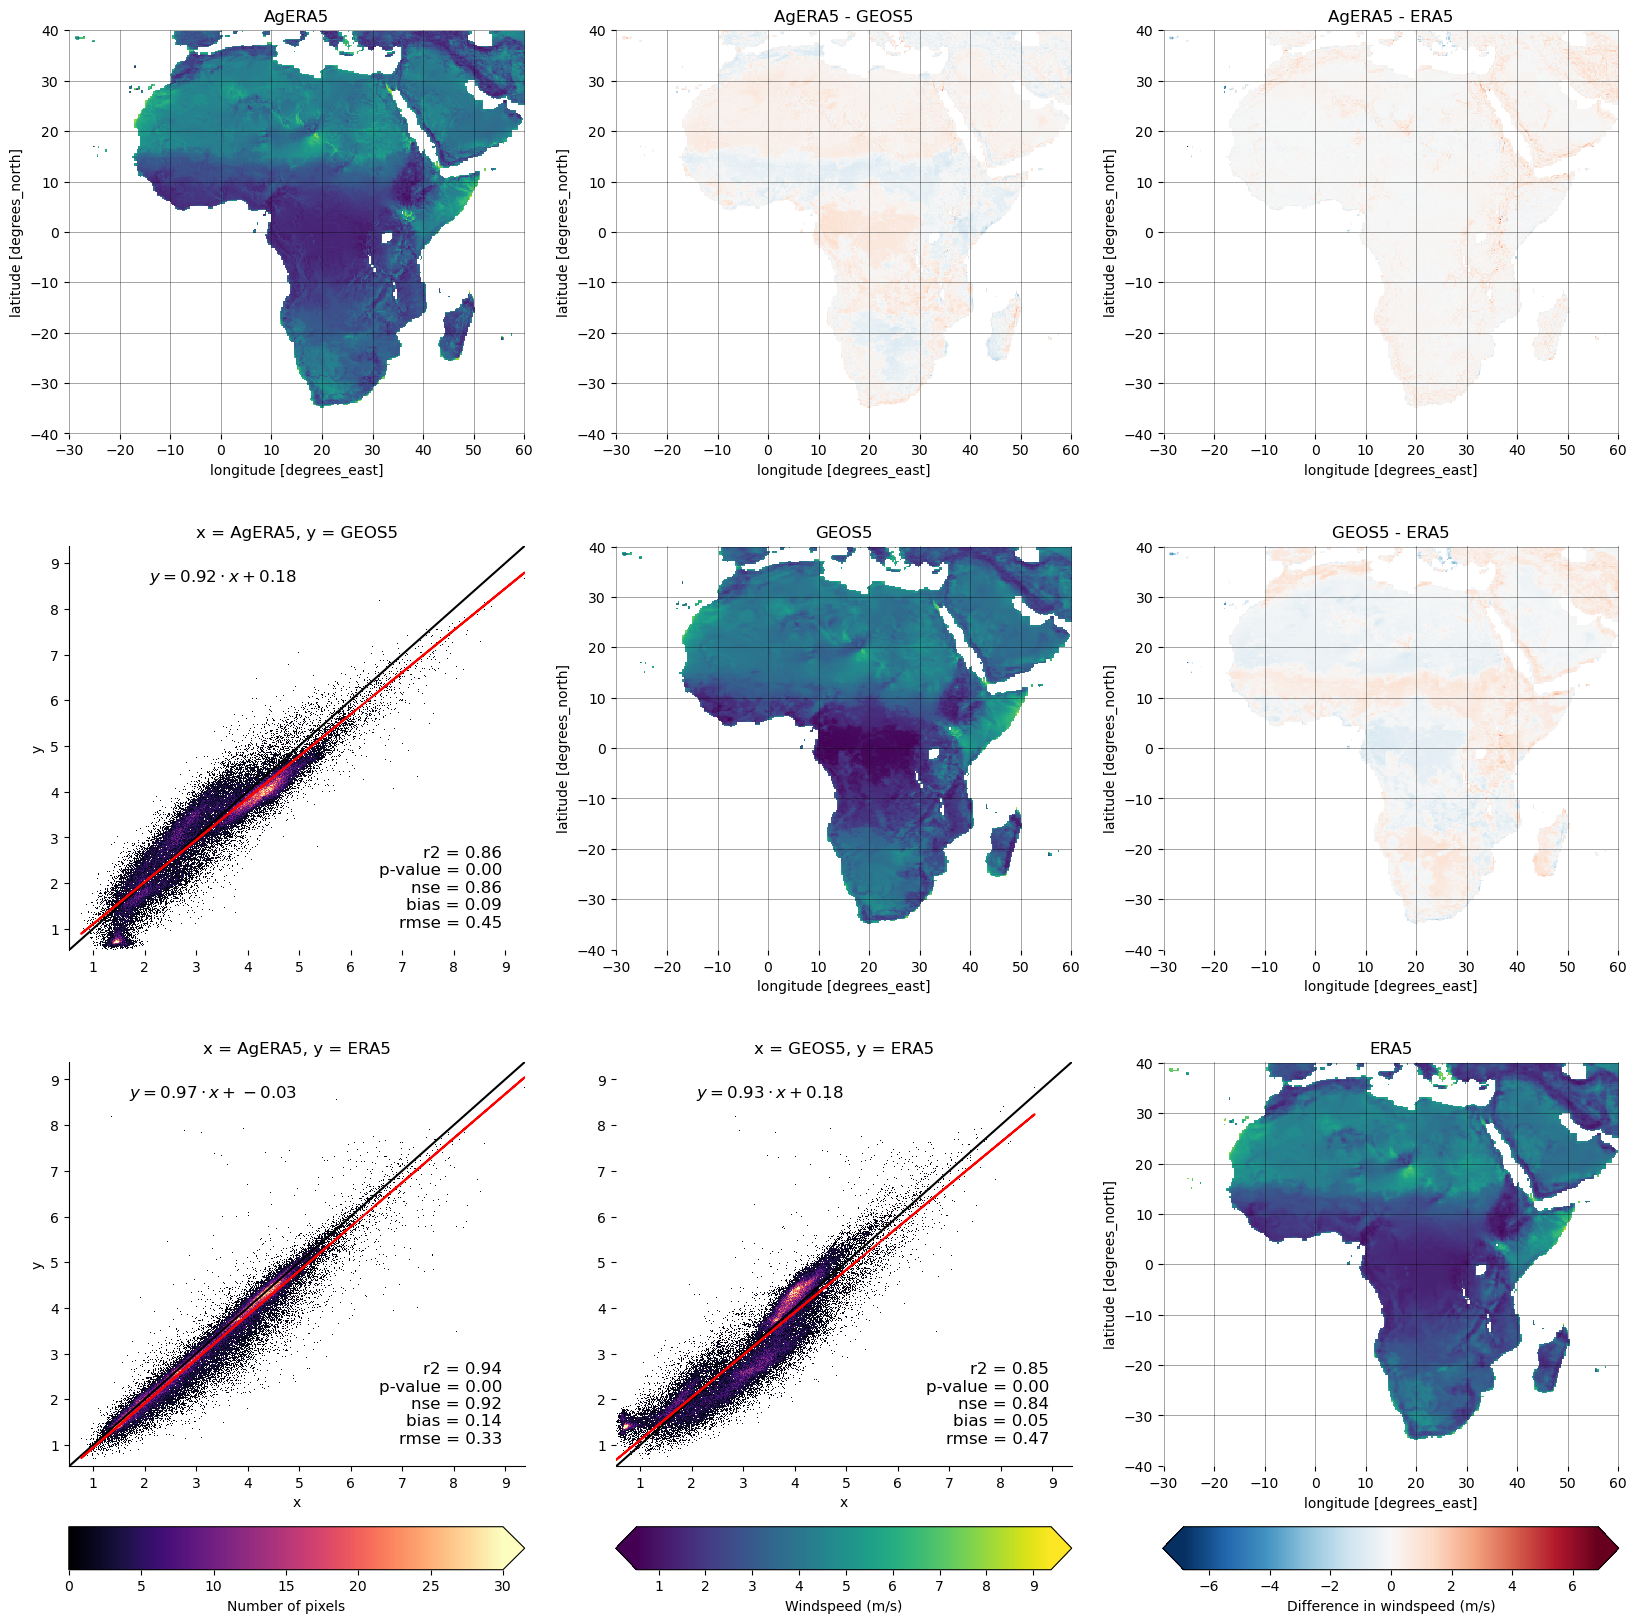

In [7]:
## Plot
### average maps
fig,diagon_axs,uptriang_axs,lotriang_axs,legends_axs = create_graph_matrix_3(figsize = [20,20])
im = subplot_image(da1, ax=diagon_axs[0], title='AgERA5', vmin=vmin, vmax=vmax)
subplot_image(da2, ax=diagon_axs[1], title='GEOS5', vmin=vmin, vmax=vmax)
subplot_image(da3, ax=diagon_axs[2], title='ERA5', vmin=vmin, vmax=vmax)
subplot_image_cbar(im, legends_axs[1], fig, label='Windspeed (m/s)')
### difference maps
im2 = subplot_image(diff1_2, ax=uptriang_axs[0], title='AgERA5 - GEOS5',vmin=-diflim, vmax=diflim,cmap='RdBu_r')
subplot_image(diff1_3, ax=uptriang_axs[1], title='AgERA5 - ERA5',vmin=-diflim, vmax=diflim,cmap='RdBu_r')
subplot_image(diff2_3, ax=uptriang_axs[2], title='GEOS5 - ERA5',vmin=-diflim, vmax=diflim,cmap='RdBu_r')
subplot_image_cbar(im2, legends_axs[2], fig, label='Difference in windspeed (m/s)')
### scatter plots
_,z=subplot_density_scatter(x1,x2, ax=lotriang_axs[0],nmax=30, 
                            spines_opt=0,
                            title='x = AgERA5, y = GEOS5',
                             axlim=(vmin,vmax)
                           )
subplot_density_scatter(x1,x3, ax=lotriang_axs[1],nmax=30, 
                        spines_opt=None,
                        title='x = AgERA5, y = ERA5',
                        axlim=(vmin,vmax)
                       )
subplot_density_scatter(x2,x3, ax=lotriang_axs[2],nmax=30, 
                        spines_opt=1,
                        title='x = GEOS5, y = ERA5',
                        axlim=(vmin,vmax)
                       )
subplot_scatter_cbar(z, legends_axs[0], fig, 'Number of pixels')

plt.savefig('./figures/graphs_matrix_u_2018-2022.png',bbox_inches='tight')
plt.show()

In [7]:
xr.corr(da2,da3)

<xarray.DataArray 'u' ()>
array(0.91964337)

In [8]:
diff2_3.mean()

<xarray.DataArray 'u' ()>
array(0.04745422)

In [11]:
err2=0
for i in range(len(x2)):
    err2+=(x2[i]-x3[i])**2
(err2/len(x2))**(1/2)

0.4740608924087109

In [10]:
err=x2-x3
np.mean(err)

0.04745422433798504

# Hovmoller

In [9]:
folder=r"E:\WaPORQA\AgERA5\Processed\Monthly\ERA5_Grid"
fhs = glob.glob(os.path.join(folder,"*.nc"))
ds=xr.open_mfdataset(fhs)  
da1 = ds.u

folder=r"E:\WaPORQA\ERA5\Processed\Monthly"
fhs = glob.glob(os.path.join(folder,"*.nc"))
ds=xr.open_mfdataset(fhs)  
da2 = ds.u

folder=r"E:\WaPORQA\GEOS5\Processed\Monthly\ERA5_Grid"
fhs = glob.glob(os.path.join(folder,"*.nc"))
ds=xr.open_mfdataset(fhs)  
da3 = ds.u

da2=da2.where(~da1.isnull(), np.nan)
da3=da3.where(~da1.isnull(), np.nan)

diff1_2=(da1-da2)
diff1_3=(da1-da3)
diff2_3=(da2-da3)

diff1_2.compute()
diff1_3.compute()
diff2_3.compute()

<xarray.DataArray 'u' (time: 60, latitude: 321, longitude: 361)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -0.07798405,
         -0.04144621, -0.03222275],
        [        nan,         nan,         nan, ..., -0.16099539,
         -0.18423367, -0.04332161],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,  0.17107868,
          0.20811462,  0.2103982 ],
        [        nan,         nan,         nan, ...,  0.09463501,
          0.06471062,  0.16020775],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,  0.21917744,
          0.26211882,  0.28383088],
        [        nan,         nan,         nan, ...,  0.11597424,
          0.15034971,  0.25712705],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 59.5 59.75 60.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2018-01-31 2018-02-28 ... 2022-12-31
    lat        (latitude) float32 40.0 39.75 39.5 39.25 ... -39.5 -39.75 -40.0
    lon        (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 59.5 59.75 60.0

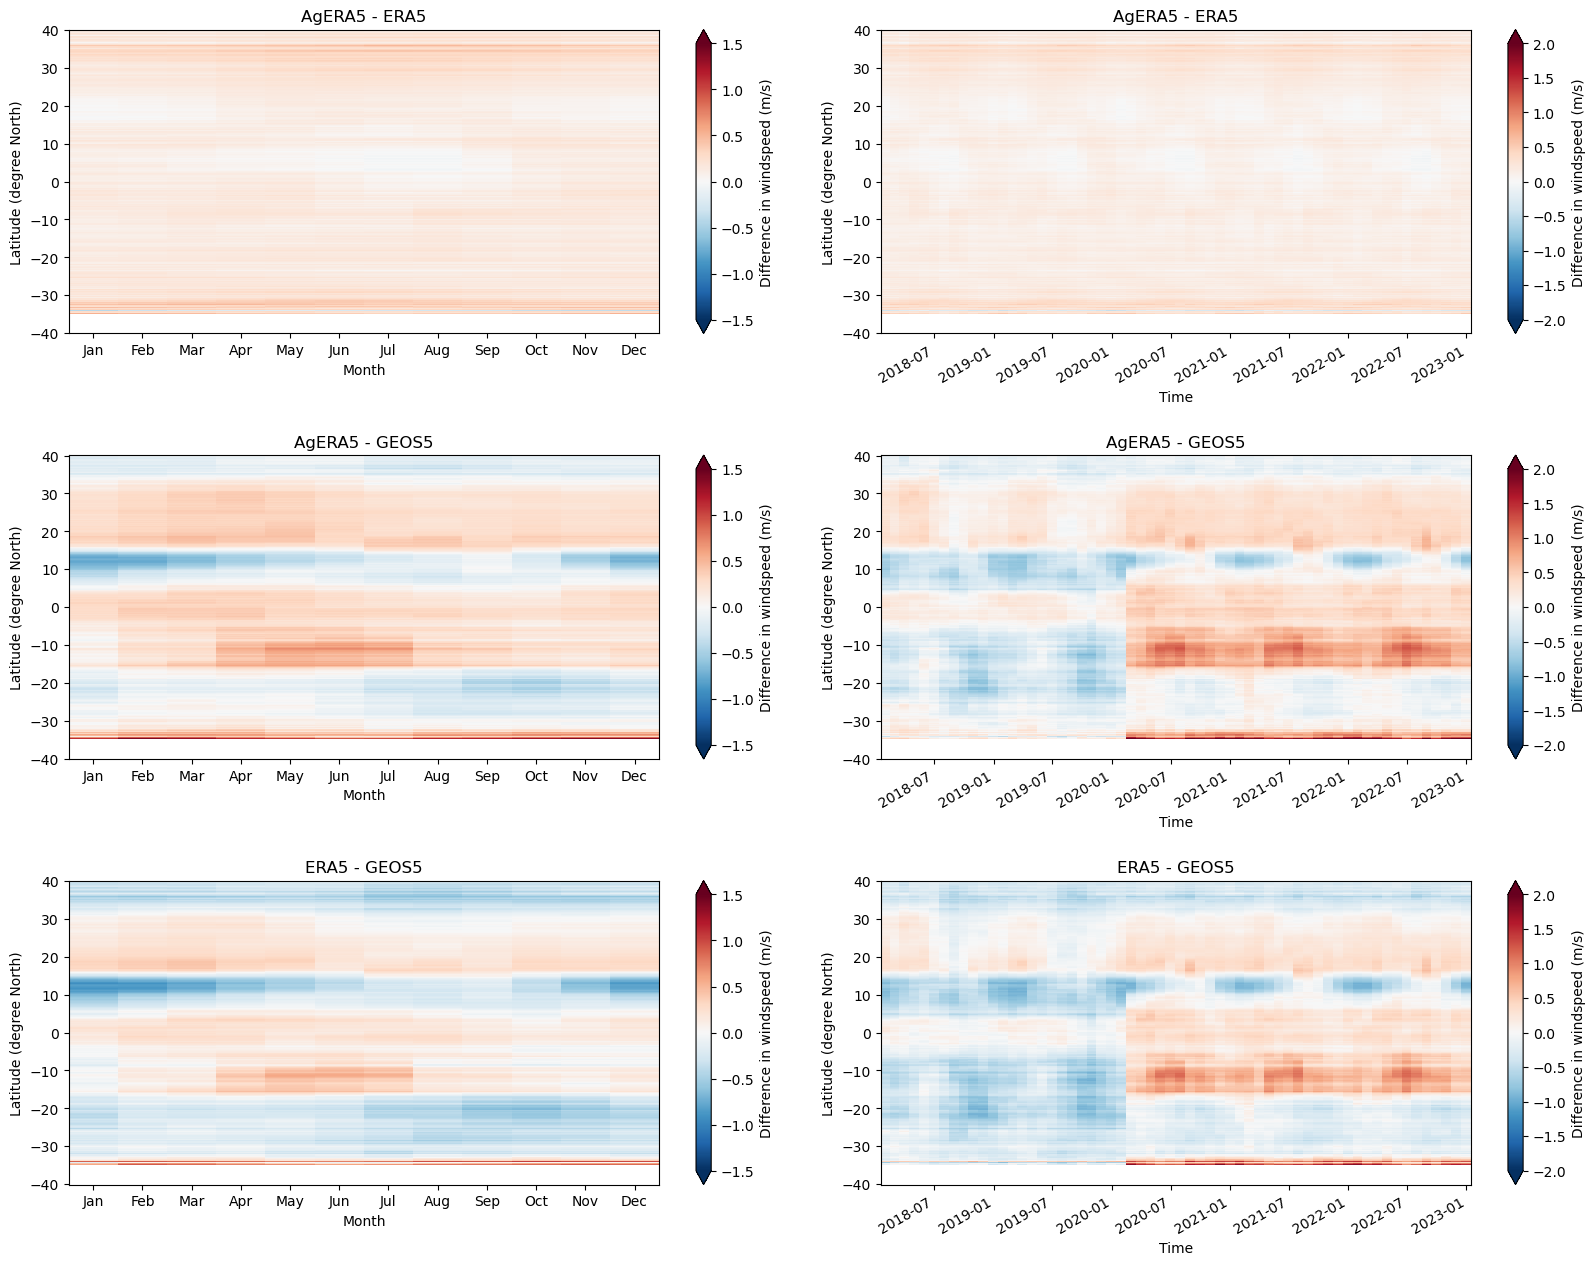

In [10]:
fig, axs = plt.subplots(3,2,figsize=(20, 15))
plt.subplots_adjust(wspace=0.1, hspace=0.4)
plot_hovmoller_month(diff1_2, title = 'AgERA5 - ERA5', ax= axs[0,0],
               varname="Difference in windspeed (m/s)",
               dimension=['longitude','latitude'],
              vmin=-1.5,vmax=1.5
                    )
plot_hovmoller(diff1_2, title = 'AgERA5 - ERA5', ax= axs[0,1],
               varname="Difference in windspeed (m/s)",
               dimension=['longitude','latitude'],
              vmin=-2,vmax=2
              )
plot_hovmoller_month(diff1_3, title = 'AgERA5 - GEOS5', ax= axs[1,0],
               varname="Difference in windspeed (m/s)",
               dimension=['longitude','latitude'],
               vmin=-1.5,vmax=1.5
                    )
plot_hovmoller(diff1_3, title = 'AgERA5 - GEOS5', ax= axs[1,1],
               varname="Difference in windspeed (m/s)",
               dimension=['longitude','latitude'],
               vmin=-2,vmax=2
              )
plot_hovmoller_month(diff2_3, title = 'ERA5 - GEOS5', ax= axs[2,0],
               varname="Difference in windspeed (m/s)",
               dimension=['longitude','latitude'],
                vmin=-1.5,vmax=1.5
                    )
plot_hovmoller(diff2_3, title = 'ERA5 - GEOS5', ax= axs[2,1],
               varname="Difference in windspeed (m/s)",
               dimension=['longitude','latitude'],
                vmin=-2,vmax=2
              )
plt.savefig('./figures/hovmoller_u_2018-2022.png',bbox_inches='tight')
plt.show()